In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

%load_ext autoreload
%autoreload 2

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("../data/matrix_FAPAN.csv", sep=' ')
file = "../data/shapefiles/FAPAN_domain_fixed_geometry/FAPAN_domain_fixed_geometry.shp"    

# open file
shp = gpd.read_file(file)

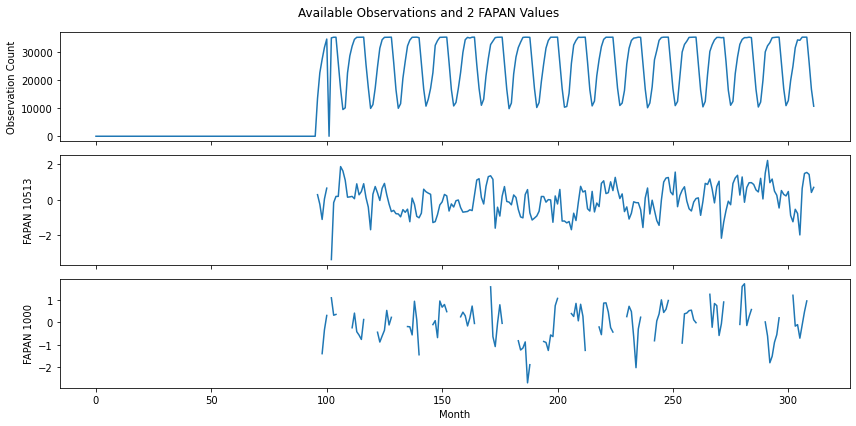

In [5]:
df_noNaN = np.array(df.notna().sum(axis=0))
x = np.arange(len(df_noNaN))

fig, axs = plt.subplots(3, figsize=(12, 6), sharex=True)
fig.suptitle('Available Observations and 2 FAPAN Values')

axs[0].plot(x, df_noNaN)
axs[0].set_ylabel('Observation Count')

axs[1].plot(x, np.array(df.iloc[10513, :]))
axs[1].set_ylabel('FAPAN 10513')

axs[2].plot(x, np.array(df.iloc[1000, :]))
axs[2].set_ylabel('FAPAN 1000')
axs[2].set_xlabel('Month')

# Hide x labels for the top and middle plots
for ax in axs[:2]:
    ax.label_outer()

plt.tight_layout()
plt.show()

In [5]:
num_last_columns=204
df = pd.read_csv("../data/matrix_FAPAN.csv", sep=' ')  
df = df.iloc[:, -num_last_columns:]
df.reset_index(inplace=True)
df = df.rename(columns = {'index':'SUBID'})
merged_df = df.merge(shp[['SUBID', 'LONGITUDE', 'LATITUDE']], on='SUBID', how='left')
merged_df.insert(1, 'x', merged_df.pop('LONGITUDE'))
merged_df.insert(2, 'y', merged_df.pop('LATITUDE'))
merged_df['x'] = merged_df['x'].astype(float)
merged_df['y'] = merged_df['y'].astype(float)
rename_mapping = {merged_df.columns[-num_last_columns+i]: str(i + 1) for i in range(num_last_columns)}
merged_df.rename(columns=rename_mapping, inplace=True)
write_path = "../data/FAPAN204.csv"
merged_df.to_csv(write_path, index=False)

In [7]:
num_last_columns=204
df = pd.read_csv("../data/matrix_FAPAN.csv", sep=' ')  
df = df.iloc[:, -num_last_columns:]
df.reset_index(inplace=True, drop=True)
df.insert(0, 'SUBID', shp['SUBID'])
df.insert(1, 'x', shp['LONGITUDE'])
df.insert(2, 'y',shp['LATITUDE'])
df['x'] = df['x'].astype(float)
df['y'] = df['y'].astype(float)
rename_mapping = {df.columns[-num_last_columns+i]: str(i + 1) for i in range(num_last_columns)}
df.rename(columns=rename_mapping, inplace=True)
write_path = "../data/FAPAN204_inline.csv"
df.to_csv(write_path, index=False)

In [10]:
df

,SUBID,x,y,1,2,3,4,5,6,7,...,195,196,197,198,199,200,201,202,203,204
0,8801544,-22.5854,65.7710,NaN,NaN,NaN,NaN,-1.318167,-0.710667,-1.528167,...,NaN,-1.370000,-0.260333,-0.206061,0.564500,0.652833,0.734500,NaN,NaN,NaN
1,8801548,-24.4720,65.5149,NaN,NaN,NaN,NaN,-0.671554,-0.407242,-0.516090,...,NaN,-0.882667,-0.690604,-2.733667,-0.385919,0.924309,0.417711,NaN,NaN,NaN
2,8000005,9.3096,59.1909,NaN,NaN,0.316444,0.187556,0.371778,-0.197000,-0.361333,...,NaN,-0.461184,1.374222,0.705667,0.906444,0.006111,0.671000,1.385000,NaN,NaN
3,8115258,8.7466,59.1359,NaN,NaN,-0.092833,-0.245083,0.815444,-0.115556,-0.607519,...,NaN,-1.772971,1.125889,0.715222,1.261407,-0.258074,-0.028667,-0.118792,NaN,NaN
4,8115717,9.2398,58.9271,NaN,NaN,1.011778,0.242000,-0.082444,-1.187556,-0.751778,...,NaN,-0.675084,1.587889,1.250889,1.530667,-0.349889,0.421222,1.035111,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35403,9566395,0.1158,49.3175,NaN,-0.095333,0.369833,0.870333,-0.808333,-0.600833,-0.217667,...,0.063833,-1.167333,1.347833,0.792500,0.670333,0.271500,0.714667,-0.216667,0.157000,NaN
35404,9581818,-5.0342,55.7842,NaN,-2.175111,-0.554933,0.682400,-0.305400,-1.754267,-1.219133,...,-0.984333,-0.536200,0.372667,-0.243667,1.084733,0.253333,0.235733,0.637400,NaN,NaN
35405,9524166,-1.0625,45.5008,0.383167,-0.174833,-0.867500,-0.657000,0.157000,-0.911500,-0.898167,...,0.818500,0.143000,1.210167,-0.834000,1.320500,1.582167,0.873333,0.259167,0.344667,-1.160333
35406,9581815,-5.1042,56.0083,NaN,-1.694333,-0.094606,0.463182,-0.502667,-1.733000,-0.600292,...,-0.876273,-0.489000,0.391727,1.161333,1.883485,0.399333,-0.062667,0.216606,NaN,NaN
